In [14]:
import pandas as pd
import geopandas as gpd
import requests
import urllib
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
%matplotlib inline
limit=500000

In [2]:
graffiti_api = "https://data.cityofchicago.org/resource/cdmx-wzbz.json?$select=service_request_number,type_of_service_request,creation_date,completion_date,what_type_of_surface_is_the_graffiti_on_,where_is_the_graffiti_located_,community_area,latitude,longitude&$where=creation_date%20%3E%20'2016-04-05'&$limit=500000"
buildings_api = "https://data.cityofchicago.org/resource/yama-9had.json?$select=service_request_number,service_request_type,date_service_request_was_received,is_building_open_or_boarded_,any_people_using_property_homeless_childen_gangs_,community_area,latitude,longitude&$where=date_service_request_was_received%20%3E%20'2016-04-05'&$limit=500000"
potholes_api = "https://data.cityofchicago.org/resource/787j-mys9.json?$select=service_request_number,type_of_service_request,status,creation_date,completion_date,community_area,latitude,longitude&$where=creation_date%20%3E%20'2016-04-05'&$limit=500000"
sanitation_api = "https://data.cityofchicago.org/resource/kcdz-f29q.json?$select=service_request_number,type_of_service_request,creation_date,completion_date,what_is_the_nature_of_this_code_violation_,community_area,latitude,longitude&$where=creation_date%20%3E%20'2016-04-05'&$limit=500000"
community_area_api = "https://data.cityofchicago.org/resource/igwz-8jzy.json"

In [3]:
graffiti_df = pd.read_json(graffiti_api, convert_dates=('creation_date',"completion_date"))
buildings_df = pd.read_json(buildings_api, convert_dates=("date_service_request_was_received"))
potholes_df = pd.read_json(potholes_api, convert_dates=('creation_date',"completion_date"))
sanitation_df = pd.read_json(sanitation_api, convert_dates=('creation_date',"completion_date"))
community_area_df = pd.read_json(community_area_api, convert_dates=('creation_date',"completion_date"))
community_area_df.set_index(['area_num_1'], inplace=True)

# Problem 1
## Graffiti

In [4]:
graffiti_df.dropna(inplace=True)
graffiti_df['completion_time'] = graffiti_df.completion_date - graffiti_df.creation_date
df_ca_by_occurrence_and_avg_response = graffiti_df.groupby([graffiti_df.community_area,graffiti_df.creation_date.dt.month]).agg({'service_request_number': lambda x: x.count(), 
                                                                                  'completion_time':lambda x: x.mean(),
                                                                                 })
df_ca_by_occurrence_and_avg_response=df_ca_by_occurrence_and_avg_response.reset_index().join(community_area_df['community'], on='community_area').set_index(df_ca_by_occurrence_and_avg_response.index.names)
#df_ca_by_occurrence_and_avg_response.join(community_area_df['community'], how='inner')

df_ca_by_occurrence_and_avg_response.rename(columns={'creation_date':'month','service_request_number':'service_requests'})


service_requests        completion_time  \
community_area creation_date                                            
0.0            1                             4        0 days 12:00:00   
               2                             5        0 days 14:24:00   
               3                             2        0 days 00:00:00   
               4                             4        2 days 00:00:00   
               5                             3        1 days 00:00:00   
               7                             3        0 days 00:00:00   
               8                             1        0 days 00:00:00   
               10                            5        0 days 04:48:00   
               11                           36        0 days 00:00:00   
               12                            1        0 days 00:00:00   
1.0            1                           144        0 days 20:30:00   
               2                           176 0 days 17:35:27.272727   
               3                           187 0 days 21:41:23.422459   
               4                            74 0 days 20:45:24.324324   
               5                           142 0 days 07:36:20.281690   
               6                           128        0 days 11:26:15   
               7                            72        0 days 19:20:00   
               8                           162        0 days 14:13:20   
               9                           126 1 days 01:31:25.714285   
               10                           99        1 days 00:00:00   
               11                          168 1 days 00:25:42.857142   
               12                           78 0 days 21:13:50.769230   
2.0            1                           179 1 days 01:52:37.541899   
               2                           139 0 days 23:49:38.417266   
               3                           125 1 days 03:04:19.200000   
               4                           181 0 days 12:19:53.370165   
               5                           190 0 days 11:06:56.842105   
               6                           134 0 days 19:52:50.149253   
               7                           174 0 days 20:41:22.758620   
               8                           489 0 days 16:53:00.368098   
...                                        ...                    ...   
75.0           1                             3        2 days 08:00:00   
               2                             2        0 days 00:00:00   
               3                             4        1 days 06:00:00   
               4                            30        0 days 00:00:00   
               5                             7 0 days 06:51:25.714285   
               6                            13 1 days 05:32:18.461538   
               7                            20        1 days 01:12:00   
               8                             4        0 days 12:00:00   
               9                             8        0 days 12:00:00   
               10                            1        0 days 00:00:00   
76.0           1                             1        1 days 00:00:00   
               3                             2        1 days 00:00:00   
               4                             1        0 days 00:00:00   
               5                            61        0 days 00:00:00   
               6                             4        0 days 06:00:00   
               7                             2        0 days 12:00:00   
               8                            41 0 days 11:42:26.341463   
               9                            40        0 days 00:36:00   
77.0           1                           126 1 days 04:57:08.571428   
               2                           144        0 days 19:50:00   
               3                           234        0 days 14:40:00   
               4                           113 0 days 09:33:27.079646   
               



### How many requests and when?
Concentrated in neighborhoods of Logan Square, West Town, Brighton Park, Avondale.

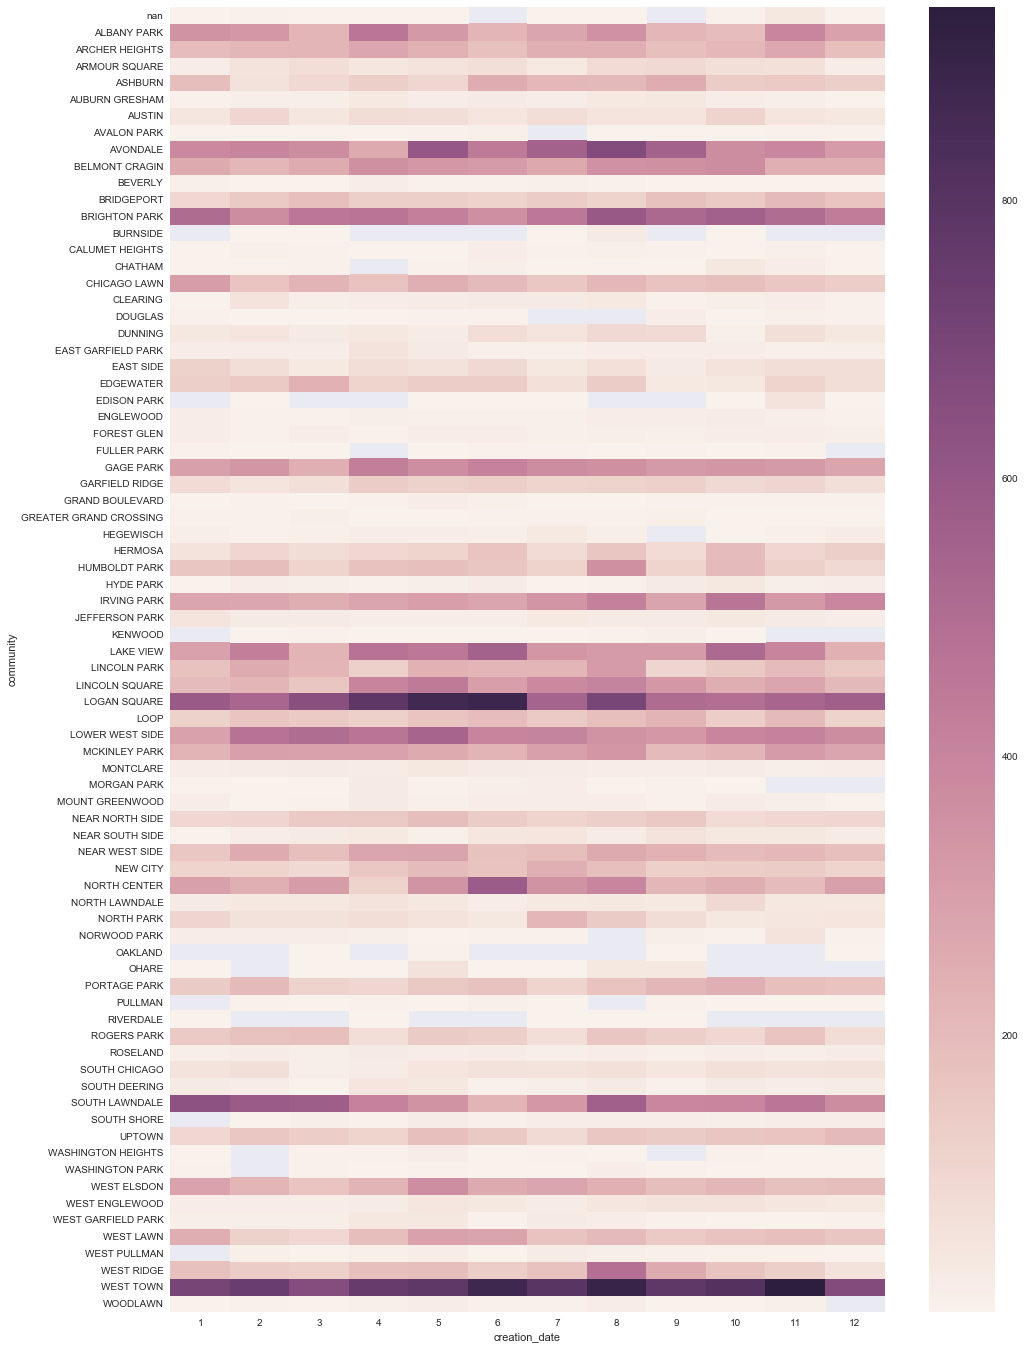

In [5]:

sb.set()
plt.figure(figsize=(16,24))
ax=sb.heatmap(df_ca_by_occurrence_and_avg_response.reset_index().pivot("community","creation_date","service_request_number"))



### Where is the graffiti located
Mostly in the front. Makes sense.

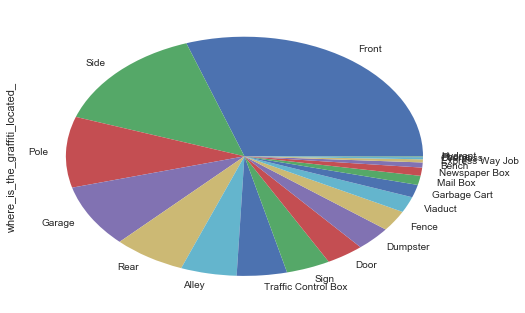

In [6]:
graffiti_df.where_is_the_graffiti_located_.value_counts().plot.pie()



### What type of surface is graffiti on?
Metal? and Brink, mostly

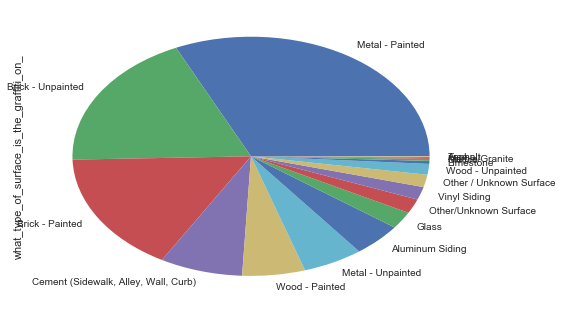

In [7]:
graffiti_df.what_type_of_surface_is_the_graffiti_on_.value_counts().plot.pie()



## Potholes
### Average completion time by neighborhood

In [8]:
#Now potholes
potholes_df['completion_time'] = potholes_df.completion_date - potholes_df.creation_date
df_ca_by_occurrence_and_avg_response_potholes = potholes_df.groupby("community_area").agg({'service_request_number': lambda x: x.count(), 'completion_time':lambda x: x.mean()})
df_ca_by_occurrence_and_avg_response_potholes.join(community_area_df['community'])

,service_request_number,completion_time,community
community_area,,,
0.0,135,23 days 07:06:14.400000,NaN
1.0,729,47 days 01:16:40.332778,ROGERS PARK
2.0,1659,43 days 15:54:25.116279,WEST RIDGE
3.0,522,27 days 08:25:52.095808,UPTOWN
4.0,733,37 days 00:18:08.503937,LINCOLN SQUARE
5.0,626,33 days 08:15:22.765598,NORTH CENTER
6.0,1159,16 days 05:46:12.929652,LAKE VIEW
7.0,1042,6 days 19:30:52.837573,LINCOLN PARK
8.0,1137,6 days 19:12:46.576819,NEAR NORTH SIDE


In [10]:
sanitation_df['completion_time'] = sanitation_df.completion_date - sanitation_df.creation_date
df_ca_by_occurrence_and_avg_response_sanitation = sanitation_df.groupby("community_area").agg({'service_request_number': lambda x: x.count(), 'completion_time':lambda x: x.mean()})
df_ca_by_occurrence_and_avg_response_sanitation.join(community_area_df['community'])

,service_request_number,completion_time,community
community_area,,,
1,188,1 days 12:22:58.723404,ROGERS PARK
2,485,1 days 11:51:04.462809,WEST RIDGE
3,377,2 days 00:11:27.533156,UPTOWN
4,205,3 days 04:57:55.862068,LINCOLN SQUARE
5,298,2 days 18:24:19.459459,NORTH CENTER
6,501,3 days 10:22:09.006085,LAKE VIEW
7,862,2 days 09:03:10.364277,LINCOLN PARK
8,221,5 days 06:08:13.150684,NEAR NORTH SIDE
9,16,2 days 18:00:00,EDISON PARK


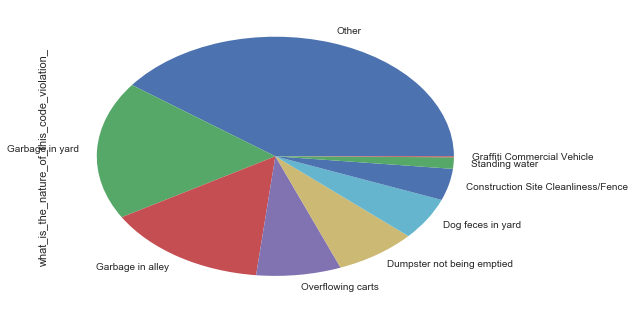

In [11]:
sanitation_df.columns.values
sanitation_df.what_is_the_nature_of_this_code_violation_.value_counts().plot.pie()

In [12]:
#sanitation_df['completion_time'] = sanitation_df.completion_date - sanitation_df.creation_date
df_ca_by_occurrence_buildings = buildings_df.groupby("community_area").agg({'service_request_number': lambda x: x.count()})
df_ca_by_occurrence_buildings.join(community_area_df['community'])

,service_request_number,community
community_area,,
0.0,1,NaN
1.0,3,ROGERS PARK
2.0,10,WEST RIDGE
3.0,5,UPTOWN
4.0,2,LINCOLN SQUARE
5.0,10,NORTH CENTER
6.0,13,LAKE VIEW
7.0,8,LINCOLN PARK
8.0,3,NEAR NORTH SIDE


## Five things I learned about Chicago:
1. Neighborhoods that start with 'L' have more graffiti.
2. The most graffitied material is metal. Since people's houses don't usually have metal surfaces, I'm guessing that would mean most graffiti is on government signs and trash cans.
3.
4.
5.




# Problem 3
### Of the four types of requests you have data for, which request type is the most likely 
### given the call came from 7500 S Wolcott Ave? What are the probabilities for each type of request?

In [15]:
def community_area_by_address(address):
    # Reverse geocode address and then spatial join with community areas map to find community area
    API_ca = "https://data.cityofchicago.org/resource/igwz-8jzy.json"
    cagdf=gpd.read_file("data/community_areas.geojson")
    GeocodeApiCall = "http://nominatim.openstreetmap.org/search/{{{}}}?format=json&addressdetails=1&limit=1&polygon_svg=1".format(urllib.parse.quote(address))
    resp = requests.get(GeocodeApiCall).json()[0]
    df = pd.DataFrame(data={'Latitude':float(resp['lat']),'Longitude':float(resp['lon'])},index=[0])
    geometry_for_query = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
    pointgdf = gpd.GeoDataFrame(df, crs=cagdf.crs, geometry=geometry_for_query)

    located_311 = gpd.sjoin(pointgdf, cagdf, how='left', op='within')

    return located_311['area_numbe'][0]

ca_of_interest = community_area_by_address("7500 S Wolcott Ave Chicago IL")
graffiti_on_ca = graffiti_df[['community_area','service_request_number']].groupby('community_area').count().loc[np.int64(ca_of_interest)]['service_request_number']
sanitation_on_ca = sanitation_df[['community_area','service_request_number']].groupby('community_area').count().loc[np.int64(ca_of_interest)]['service_request_number']
potholes_on_ca = potholes_df[['community_area','service_request_number']].groupby('community_area').count().loc[np.int64(ca_of_interest)]['service_request_number']
buildings_on_ca = buildings_df[['community_area','service_request_number']].groupby('community_area').count().loc[np.int64(ca_of_interest)]['service_request_number']
total_311_on_ca = graffiti_on_ca + potholes_on_ca + buildings_on_ca + sanitation_on_ca
prob_graffiti = graffiti_on_ca/total_311_on_ca
prob_sanitation = sanitation_on_ca/total_311_on_ca
prob_potholes = potholes_on_ca/total_311_on_ca
prob_buildings = buildings_on_ca/total_311_on_ca
print("The probability that it's a call about graffiti is {0}".format(prob_graffiti))
print("The probability that it's a call about sanitation is {0}".format(prob_sanitation))
print("The probability that it's a call about potholes is {0}".format(prob_potholes))
print("The probability that it's a call about vacant buildings is {0}".format(prob_buildings))

The probability that it's a call about graffiti is 0.10181975736568458
The probability that it's a call about sanitation is 0.27642980935875217
The probability that it's a call about potholes is 0.48743500866551126
The probability that it's a call about vacant buildings is 0.134315424610052


### Based on the statistics per neighborhood (community area), it's more likely to be a call about potholes


## Let’s now assume that a call comes in about Graffiti Removal. Which is more likely – that the call came from Lawndale or Uptown? How much more or less likely is it to be from Lawndale versus Uptown?

In [16]:
graffiti_df_by_ca = graffiti_df[['community_area','service_request_number']].groupby('community_area').count()
graffiti_df_by_ca.loc[[29.0, 30.0]].service_request_number/graffiti_df_by_ca.loc[3.0].service_request_number

community_area
29.0    0.277019
30.0    3.014221
Name: service_request_number, dtype: float64

There are two neighborhoods named Lawndale, North Lawndale and South Lawndale. The call is more likely to come from South Lawndale, and then from Uptown and then from North Lawndale in decreasing probability.
Each one is roughly three times more likely to produce the call than the next.